# Testing Header Update !!!

Here is some info. Here is some more info.


In [8]:
# !pip uninstall -y matplotlib && pip install matplotlib==3.7.2

::: {.callout-note title="QSP circuit" icon=false}

\begin{align}
U*\phi =S(\phi_0)\prod*{i=1}^d R(a) S(\phi*i) = S(\phi_0)R(a) S(\phi_1) R(a)\dots S(\phi*{d-1}) R(a) S(\phi_d)
\end{align}
:::


In [9]:
# define gateset as any basis with coordinates (x,y, 0)
# want to find set of 2 gates that give largest disjoint volume
from monodromy.haar import gates_to_haar, expected_cost
from monodromy.render import _plot_coverage_set
from monodromy.coverage import gates_to_coverage, print_coverage_set
from monodromy.haar import gates_to_haar, expected_cost
from monodromy.render import _plot_coverage_set
from monodromy.coverage import gates_to_coverage, print_coverage_set
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from qiskit.circuit.library import iSwapGate
import time

In [10]:
# g = canonical_gate(*np.array([0.25, 0.25, 0])).full()
# g = UnitaryGate(g)
# g.name = "g"
# print(gates_to_haar(g))
# _ = gates_to_coverage_plot(g)

In [11]:
gp = 1 / 4
g = iSwapGate().power(gp)
hp = 1 / 5
h = iSwapGate().power(hp)
gates = [(g, gp), (h, hp)]

### Making sure monodromy works for a basic example.

Test with a single gate compared to a basis with two basis gates.


In [12]:
# print(gates_to_haar(g, h))
coverage = gates_to_coverage(*[g], costs=[gp])
print(expected_cost(coverage))

0.9598936659817359


In [13]:
# print(gates_to_haar(g, h))
coverage = gates_to_coverage(*[g, h], costs=[gp, hp])
print(expected_cost(coverage))
# print_coverage_set(coverage)

0.8787242759647856


See @fig-coverage1 to see the coverage set.


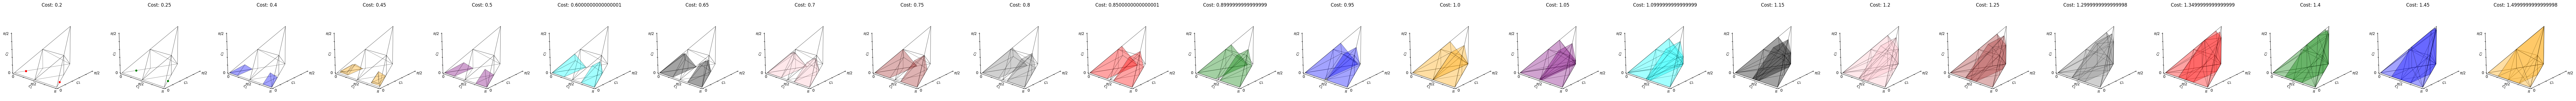

In [ ]:
# | label: fig-coverage1
# | fig-cap: Coverage set for a mixed basis.
_plot_coverage_set(coverage)

## Calculate asymptotic Haar score for iSWAP basis.


In [15]:
# Hardcoded list of denominators: powers of 2 and primes up to 64
denominators = [2, 4, 8, 16, 32, 64]
denominators += [
    3,
    5,
    7,
    11,
    13,
    17,
    19,
    23,
    29,
    31,
    37,
    41,
    43,
    47,
    53,
    59,
    61,
]
fractional_powers = [1 / d for d in denominators]

# Lists to store results and runtimes
haar_scores = []
decomposition_costs = []
runtimes = []

for gp in tqdm(fractional_powers):
    start_time = time.time()

    # Create the iSWAP gate powered by the fractional power
    g = iSwapGate().power(gp)

    # Compute the Haar score
    haar_score = gates_to_haar(g)
    haar_scores.append(haar_score)

    # Compute the expected decomposition cost
    coverage = gates_to_coverage(g, costs=[gp])
    cost = expected_cost(coverage)
    decomposition_costs.append(cost)

    end_time = time.time()
    runtime = end_time - start_time
    runtimes.append(runtime)

  0%|          | 0/23 [00:00<?, ?it/s]

100%|██████████| 23/23 [28:07<00:00, 73.37s/it] 


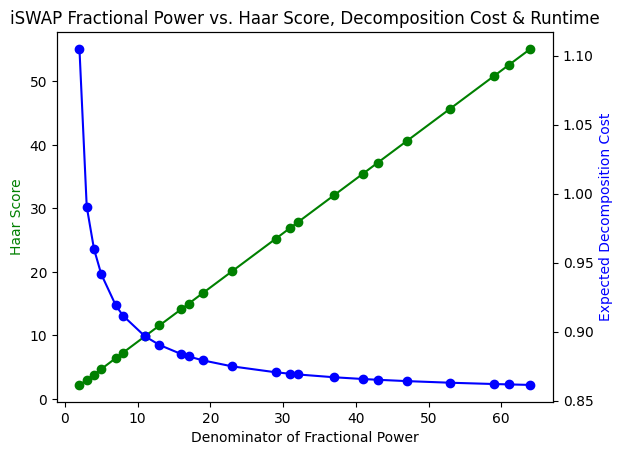

In [23]:
# Plot the results
fig, ax1 = plt.subplots()

# Twin the axes for decomposition costs
ax2 = ax1.twinx()

# # Twin the axes again for runtimes
# ax3 = ax1.twinx()

# Move the last Y axis to the right
# ax3.spines["right"].set_position(("outward", 60))

# Plot Haar scores
ax1.plot(denominators, haar_scores, "g-o")
ax1.set_xlabel("Denominator of Fractional Power")
ax1.set_ylabel("Haar Score", color="g")

# Plot decomposition costs
ax2.plot(denominators, decomposition_costs, "b-o")
ax2.set_ylabel("Expected Decomposition Cost", color="b")

# # Plot runtimes
# ax3.plot(denominators, runtimes, "r--o")
# ax3.set_ylabel("Runtime (seconds)", color="r")

plt.title(
    "iSWAP Fractional Power vs. Haar Score, Decomposition Cost & Runtime"
)
plt.show()

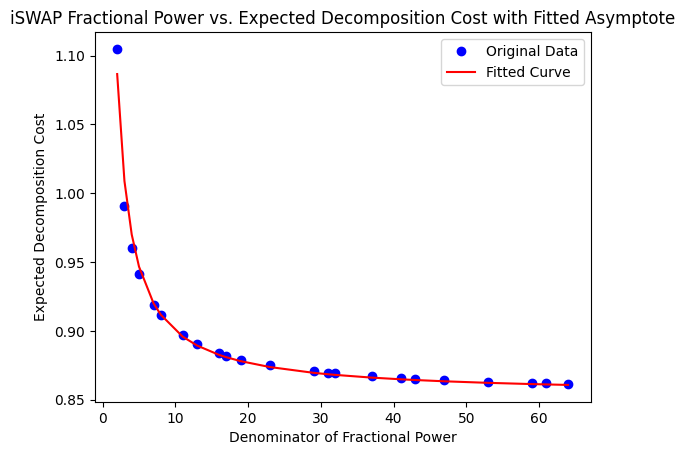

Asymptote (a): 0.8533496992457048


In [25]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Define the reciprocal function
def reciprocal(x, a, b):
    return a + b / x


# Fit the data using curve_fit
params, covariance = curve_fit(reciprocal, denominators, decomposition_costs)

# Extract the fitted parameters
a, b = params

# Generate the fitted curve using the extracted parameters
fitted_curve = [reciprocal(d, a, b) for d in denominators]

# Plot the original data and the fitted curve
plt.plot(denominators, decomposition_costs, "bo", label="Original Data")
plt.plot(denominators, fitted_curve, "r-", label="Fitted Curve")
plt.xlabel("Denominator of Fractional Power")
plt.ylabel("Expected Decomposition Cost")
plt.legend()
plt.title(
    "iSWAP Fractional Power vs. Expected Decomposition Cost with Fitted Asymptote"
)
plt.show()

print(f"Asymptote (a): {a}")

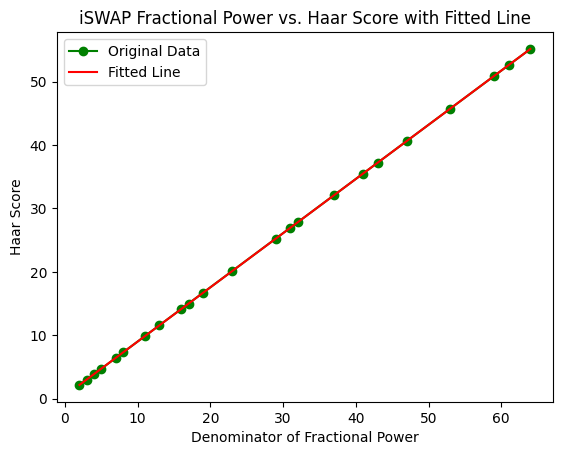

Slope (m): 0.8543795110777335
Intercept (c): 0.457798292267894


In [18]:
# Define the linear function
def linear(x, m, c):
    return m * x + c


# Fit the data using curve_fit
params, _ = curve_fit(linear, denominators, haar_scores)

# Extract the fitted parameters
m, c = params

# Generate the fitted curve using the extracted parameters
fitted_curve = [linear(d, m, c) for d in denominators]

# Plot the original data and the fitted curve
plt.plot(denominators, haar_scores, "g-o", label="Original Data")
plt.plot(denominators, fitted_curve, "r-", label="Fitted Line")
plt.xlabel("Denominator of Fractional Power")
plt.ylabel("Haar Score")
plt.legend()
plt.title("iSWAP Fractional Power vs. Haar Score with Fitted Line")
plt.show()

print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

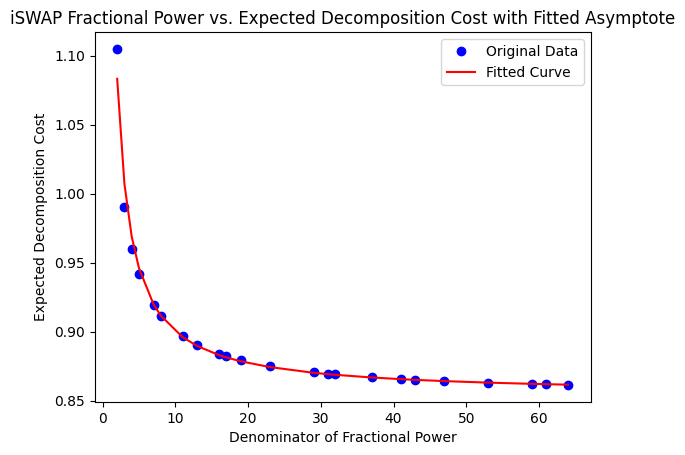

In [26]:
# Extract the fitted parameters
a, b = m, c

# Generate the fitted curve using the extracted parameters
fitted_curve = [reciprocal(d, a, b) for d in denominators]

# Plot the original data and the fitted curve
plt.plot(denominators, decomposition_costs, "bo", label="Original Data")
plt.plot(denominators, fitted_curve, "r-", label="Fitted Curve")
plt.xlabel("Denominator of Fractional Power")
plt.ylabel("Expected Decomposition Cost")
plt.legend()
plt.title(
    "iSWAP Fractional Power vs. Expected Decomposition Cost with Fitted Asymptote"
)
plt.show()